# Robust Deep Reinforcement Learning against Adversarial Perturbations on State Observations
[link](https://arxiv.org/pdf/2003.08938.pdf)  

## Setup
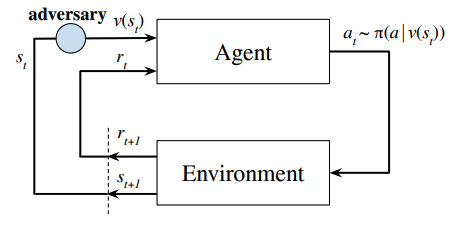

$\nu(s): S \rightarrow S$ is a deterministic function which only depends on current state $s$.   

$B(s)$ is the set of allowed perturbations.  

## Optimal adversary
$\tilde{V}_{\pi \diamond \nu^{*}}(s)=\min _{\nu} \tilde{V}_{\pi o \nu}(s), \quad \tilde{Q}_{\pi \circ \nu^{*}}(s, a)=\min _{\nu} \tilde{Q}_{\pi \diamond \nu}(s, a)$

Both the $V$ and $Q$ should be minimized. 

Bellman operator: Given a state $s$, return the optimal adversary $s'$.  
$(\mathscr{L} \tilde{V})(s)=\min _{s_{\nu} \in B(s)} \sum_{a \in \mathcal{A}} \pi\left(a \mid s_{\nu}\right) \sum_{s^{\prime} \in \mathcal{S}} p\left(s^{\prime} \mid s, a\right)\left[R\left(s, a, s^{\prime}\right)+\gamma \tilde{V}\left(s^{\prime}\right)\right]$

## Optimal Policy
Best policy  $\pi^*$.    
$\tilde{V}_{\pi^{*} \circ \nu^{*}\left(\pi^{*}\right)}(s) \geq \tilde{V}_{\pi o \nu^{*}(\pi)}(s) \quad \text { for } \forall s \in \mathcal{S} \text { and } \forall \pi$  

## Theorems
$\exists SA-MDP$ and stochastic policy $\pi \in \Pi_{M R}$, there is no deterministic policy $\pi' \in \Pi_{MD}$ such that $\tilde{V}_{\pi^{\prime} \circ \nu^{*}\left(\pi^{\prime}\right)}(s) \geq \tilde{V}_{\pi \circ \nu^{*}(\pi)}(s) \text { for all } s \in \mathcal{S}$

$ \text { Under the optimal } \nu^{*} \text { , an optimal policy } \pi^{*} \in \Pi_{M R} \text { does not always exist for } S A \text { -MDP }$ 

Performance of policy after perturbation is bounded by $\max _{s \in \mathcal{S}}\left\{V_{\pi}(s)-\tilde{V}_{\pi \circ \nu^{*}(\pi)}(s)\right\} \leq \alpha \max _{s \in \mathcal{S}} \max _{\hat{s} \in B(s)} \mathrm{D}_{\mathrm{TV}}(\pi(\cdot \mid s), \pi(\cdot \mid \hat{s}))$. 

## Robustness Training

### Stochastic Policy
The change of value function is bounded by $D_{TV}$ and thus bounded by $D_{KL}$. Optimize the $KL-regularizer$ can train a more robust policy against certain attack. 

$$
\mathcal{R}_{\mathrm{PPO}}\left(\theta_{\mu}\right)=\frac{1}{2} \sum_{s} \max _{\hat{s} \in B(s)}\left(\mu_{\theta_{\mu}}(\hat{s})-\mu_{\theta_{\mu}}(s)\right)^{\top} \Sigma^{-1}\left(\mu_{\theta_{\mu}}(\hat{s})-\mu_{\theta_{\mu}}(s)\right):=\frac{1}{2} \sum_{s} \max _{\hat{s} \in B(s)} \mathcal{R}_{s}\left(\hat{s}, \theta_{\mu}\right)
$$

Optimizing on this minimax regularizer is hard, they employed the convex relaxation based method and SGLD. 

### Deterministic Policy

$$\mathcal{R}_{\mathrm{DDPG}}\left(\theta_{\pi}\right)=\sqrt{2 / \pi}(1 / \sigma) \sum_{s} \max _{\hat{s} \in B(s)}\left\|\pi_{\theta_{\pi}}(s)-\pi_{\theta_{\pi}}(\hat{s})\right\|_{2}$$

## Attack Proposed
### Robust SARSA (RS) attack
Learn a Q function for trained function with SARSA (plus a robust regularizer), attack with the learned Q function. 

### Maximal Action Difference (MAD) attack

Maximizing $D_{KL}$.  